In [2]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 


In [3]:
#Line style syntax importation.
%matplotlib inline

# Structuring the code.
import math, datetime, time, random

# Accessing, extracting, manipulating and modifying your observations.
import pandas as pd
import numpy as np

# Visualisations
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import plotly
import plotly.express as px
plt.style.use("seaborn-whitegrid")

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importing train and test data.

train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
gender_submission = pd.read_csv("/content/gender_submission.csv")

\# 1. The Ticket Feature (Predictor variable). 
> 1. Under the hood processes.
> 2. Visualisations.

In [5]:
"""
#understand ticket values better 
#numeric vs non numeric 

train['numeric_ticket'] = train.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)

train['ticket_letters'] = train.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) > 0 else 0)

train['numeric_ticket'].value_counts()

#lets us view all rows in dataframe through scrolling. This is for convenience 

pd.set_option("max_rows", None)

train['ticket_letters'].value_counts()

"""

'\n#understand ticket values better \n#numeric vs non numeric \n\ntrain[\'numeric_ticket\'] = train.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)\n\ntrain[\'ticket_letters\'] = train.Ticket.apply(lambda x: \'\'.join(x.split(\' \')[:-1]).replace(\'.\',\'\').replace(\'/\',\'\').lower() if len(x.split(\' \')[:-1]) > 0 else 0)\n\ntrain[\'numeric_ticket\'].value_counts()\n\n#lets us view all rows in dataframe through scrolling. This is for convenience \n\npd.set_option("max_rows", None)\n\ntrain[\'ticket_letters\'].value_counts()\n\n'

In [6]:
train.Ticket.head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [8]:
train.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [9]:
train.Ticket.describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [10]:
train.Ticket.dtype

dtype('O')

In [11]:
train['numeric_ticket'] = train.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
train['ticket_letters'] = train.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) > 0 else 0)

In [12]:
train.numeric_ticket.unique()

array([0, 1])

In [13]:
#lets us view all rows in dataframe through scrolling. This is for convenience 
pd.set_option("max_rows", None)
train['numeric_ticket'].value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

In [14]:
train.ticket_letters.unique()

array(['a5', 'pc', 'stono2', 0, 'pp', 'ca', 'scparis', 'sca4', 'a4', 'sp',
       'soc', 'wc', 'sotonoq', 'wep', 'c', 'sop', 'fa', 'fcc', 'swpp',
       'scow', 'ppp', 'sc', 'scah', 'as', 'scahbasle', 'sopp', 'fc',
       'sotono2', 'casoton'], dtype=object)

In [15]:
pd.set_option("max_rows", None)
train.ticket_letters.value_counts()

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
fcc            5
c              5
sopp           3
pp             3
wep            3
ppp            2
scah           2
sotono2        2
swpp           2
fc             1
scahbasle      1
as             1
sp             1
sc             1
scow           1
fa             1
sop            1
sca4           1
casoton        1
Name: ticket_letters, dtype: int64

In [16]:
pd.pivot_table(train, index = 'Survived', columns = 'ticket_letters', values = 'Ticket', aggfunc ='count')

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [17]:
pd.pivot_table(train, index = 'Survived', columns = 'numeric_ticket', values = 'Ticket', aggfunc ='count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


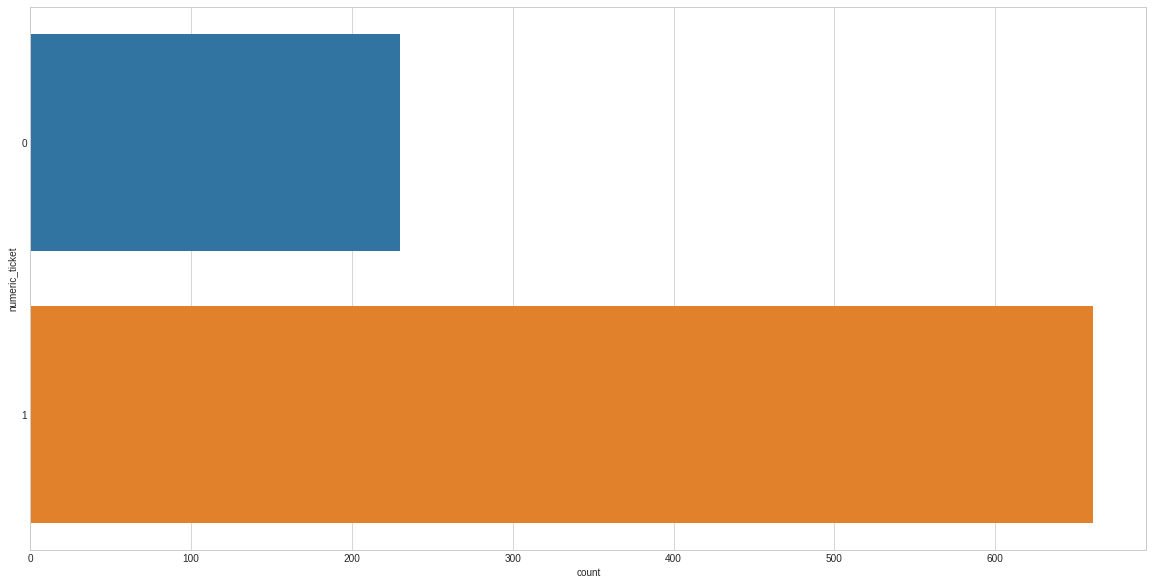

In [18]:
# How many people survived?
fig = plt.figure(figsize=(20, 10))
sns.countplot(y='numeric_ticket', data=train);

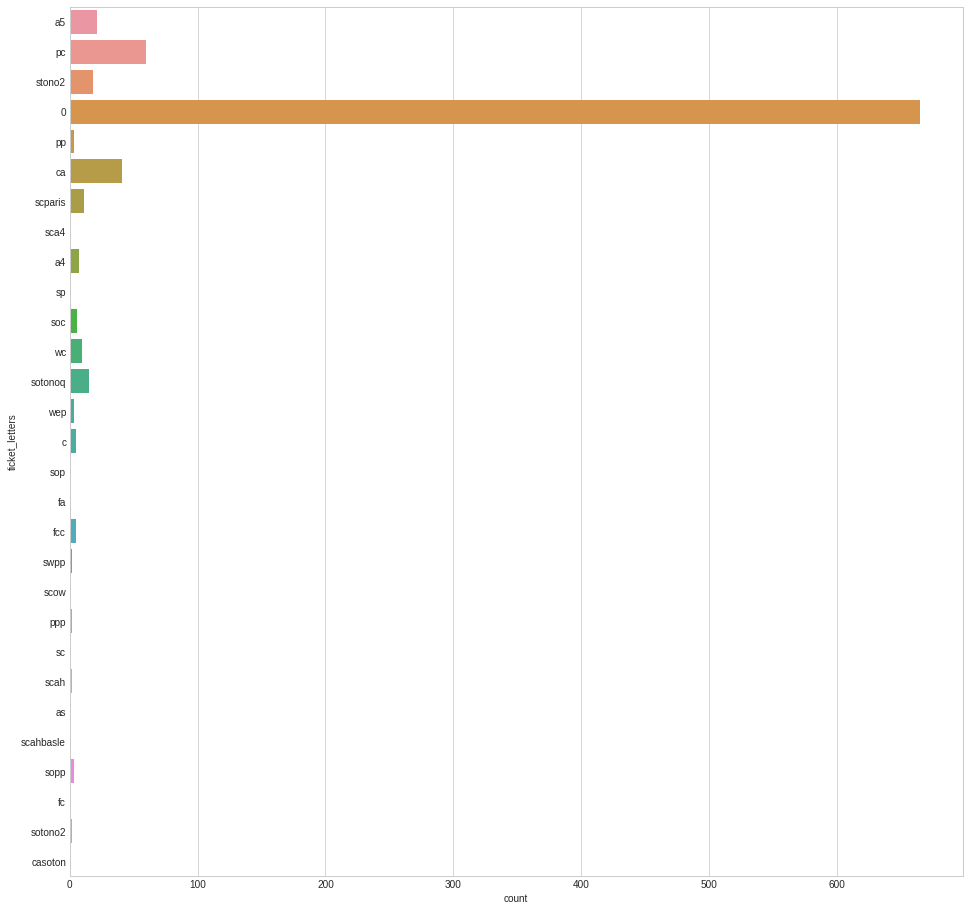

In [19]:
# How many people survived?x
fig = plt.figure(figsize=(16, 16))
sns.countplot(y='ticket_letters', data=train);

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,numeric_ticket,ticket_letters
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,a5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,pc
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,stono2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0
